In [1]:
%%capture
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
!pip install qpsolvers
import qpsolvers
!pip install qpsolvers[cvxopt]
!pip install qpsolvers[open_source_solvers]
!pip install qpsolvers[clarabel]
from qpsolvers import solve_qp

In [2]:
mushroom_whole = pd.read_csv('mushroom.csv')
classes_to_keep = mushroom_whole['class'].copy()
mushroom_whole = mushroom_whole.drop(['class'], axis=1)
cols = mushroom_whole.columns.copy()
mushroom_whole = StandardScaler().fit_transform(X=mushroom_whole.to_numpy())
mushroom_whole = pd.DataFrame(mushroom_whole)
mushroom_whole.columns = cols
mushroom_whole['class'] = classes_to_keep
mushroom_data = mushroom_whole.sample(frac=0.5)
list_train = mushroom_data.index
list_test = []
for i in mushroom_whole.index:
    if i not in list_train:
        list_test.append(i)
mushroom_test = mushroom_whole.filter(items=list_test, axis=0)

mushroom_test = mushroom_test.reset_index(drop=True)
mushroom_data = mushroom_data.reset_index(drop=True)
n_samples = mushroom_data.shape[0]
n_samples_test = mushroom_test.shape[0]

In [3]:
np.random.seed(1452234)
label = np.zeros(n_samples)
for i in range(n_samples):
    random = bernoulli.rvs(p=3/4)
    if mushroom_data.loc[i,'class'] == 1 and random == 0:
        label[i] = 1
    else:
        label[i] = -1
mushroom_data['label'] = label

list_of_gamma = np.linspace(0.0001,1,10)

dico_of_diff = {}
for the_gamma in list_of_gamma:

    svm_train = SVC(kernel='sigmoid', probability = True,
                    gamma=the_gamma).fit(X=mushroom_data.to_numpy()[:,:-2],
                                      y=mushroom_data.to_numpy()[:,-1])
    probas = svm_train.predict_proba(mushroom_data.to_numpy()[:,:-2])
    
    proba_gap = probas[:,1] - probas[:,0]
    
    biggest_diff = np.max(proba_gap) - np.min(proba_gap)

    dico_of_diff[str(the_gamma)] = biggest_diff


In [15]:
list_of_diff = []
compteur = 0
for i in dico_of_diff.keys():
    list_of_diff.append(dico_of_diff[i])

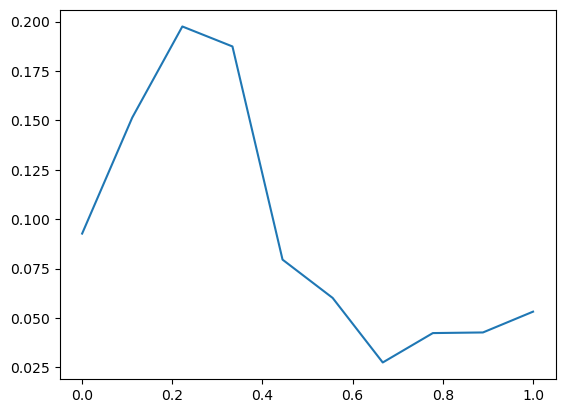

In [16]:
plt.plot(list_of_gamma,list_of_diff)